# Caso: Estancia hospitalaria

## Enunciado del problema y caso práctico.

La hospitalización, o estancia hospitalaria, cuando es prolongada constituye una preocupación a nivel mundial debido a sus efectos negativos en el sistema de salud, aumentando los costos, generando deficiencia en la accesibilidad de prestación de servicios de salud, saturación de unidades de hospitalización y urgencias, por consiguiente, mayores efectos adversos como lo son las enfermedades intrahospitalarias.

El estudio de los procesos de atención en salud, así como el conocimiento de las características y perfiles de los usuarios con el objetivo de predecir la ocupación hospitalaria, es uno de los aspectos al que las autoridades de salud han prestado gran interés, pues permite no sólo garantizar los recursos necesarios para la atención del paciente, sino realizar ajustes respecto a la oferta y demanda de los servicios de salud y los implementos asociados.

## Objetivo a tener en cuenta.

Un importante Centro de Salud lo ha contratado con el fin de poder predecir si un paciente tendrá una estancia hospitalaria prolongada o no, utilizando la información contenida en el dataset asociado, la cual recaba una muestra histórica de sus pacientes, para poder administrar la demanda de camas en el hospital según la condición de los pacientes recientemente ingresados.

Para esto, se define que un paciente posee estancia hospitalaria prolongada si ha estado hospitalizado más de 8 días. Por lo que debe generar dicha variable categórica y luego categorizar los pacientes según las variables que usted considere necesarias, justificando dicha elección.

# Importar las librerias que se usarán

In [61]:
# Manipulación del DataFrame
import pandas as pd
import numpy as np

# Gráficas y visualización
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Preprocesamiento
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Procesamiento
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf

# Evaluación del modelo
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('Librerias importadas !')

Librerias importadas !


# Carga y transformación de datos

## Visualización del dataset

### Creación de DataFrame

In [4]:
# Extraemos los datos del dataset 'hospitalizaciones_train.csv'
data = pd.read_csv('hospitalizaciones_train.csv')
print('DataFrame cargado !!!')

DataFrame cargado !!!


### Variables que posee el DataFrame

In [5]:
# Vemos las columnas que tiene el dataset
data.columns

Index(['Available Extra Rooms in Hospital', 'Department', 'Ward_Facility_Code',
       'doctor_name', 'staff_available', 'patientid', 'Age', 'gender',
       'Type of Admission', 'Severity of Illness', 'health_conditions',
       'Visitors with Patient', 'Insurance', 'Admission_Deposit',
       'Stay (in days)'],
      dtype='object')

### Número de renglones y columas de los DataFrames

In [6]:
# Su numero de filas y columnas
data.shape

(410000, 15)

### Tipos de datos de cada variable del DataFrame


In [7]:
# Tipo de variable que tenemos
data.dtypes

Available Extra Rooms in Hospital      int64
Department                            object
Ward_Facility_Code                    object
doctor_name                           object
staff_available                        int64
patientid                              int64
Age                                   object
gender                                object
Type of Admission                     object
Severity of Illness                   object
health_conditions                     object
Visitors with Patient                  int64
Insurance                             object
Admission_Deposit                    float64
Stay (in days)                         int64
dtype: object

### Gráfica de los valores nulos del DataFrame


<AxesSubplot:>

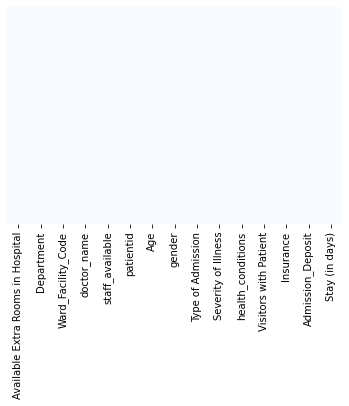

In [8]:
# Visualización de valores nulos en el DataFrame
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

Notamos que las columnas del dataset no posee valores nulos.

### Visualización más detallada del DataFrame


In [9]:
data

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,D,Dr Sarah,1,63105,31-40,Female,Trauma,Minor,Asthama,3,Yes,3902.291076,8
409996,5,gynecology,D,Dr Nathan,5,129292,21-30,Female,Trauma,Extreme,Other,4,No,4771.995223,9
409997,4,gynecology,D,Dr Sarah,9,11399,21-30,Female,Emergency,Minor,Asthama,4,Yes,3816.994210,9
409998,10,gynecology,D,Dr Olivia,10,75003,21-30,Female,Trauma,Moderate,Other,2,Yes,3841.577491,9


### Estadísticos


In [10]:
# Resumen global de estadisticos:
data.describe()

,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days)
count,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000
mean,3.639376,5.020946,63095.940020,3.552520,4723.419239,12.378193
std,2.701702,3.158018,41686.175937,2.247459,1047.420292,7.905618
min,0.000000,0.000000,-3146.000000,0.000000,1654.005148,3.000000
25%,2.000000,2.000000,25405.000000,2.000000,4072.638351,8.000000
50%,3.000000,5.000000,57736.000000,3.000000,4627.488745,9.000000
75%,4.000000,8.000000,103278.250000,4.000000,5092.349430,11.000000
max,24.000000,10.000000,134400.000000,32.000000,10104.726390,51.000000


A simple vista se observa que puede haber algunos outliers en las columnas 'Available Extra Rooms in Hospital' y 'Visitors with Patient' que se analizarán más adelante.

### Análisis rápido de las categorías usando un histograma.


array([[<AxesSubplot:title={'center':'Available Extra Rooms in Hospital'}>,
        <AxesSubplot:title={'center':'staff_available'}>],
       [<AxesSubplot:title={'center':'patientid'}>,
        <AxesSubplot:title={'center':'Visitors with Patient'}>],
       [<AxesSubplot:title={'center':'Admission_Deposit'}>,
        <AxesSubplot:title={'center':'Stay (in days)'}>]], dtype=object)

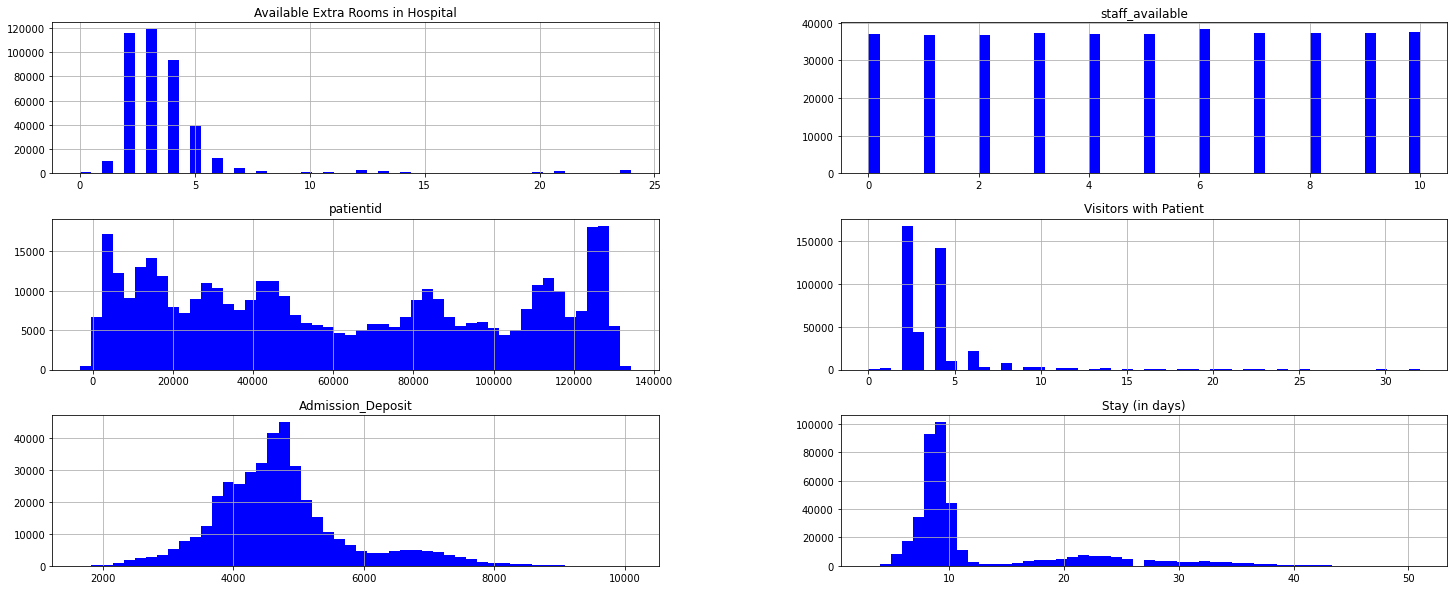

In [11]:
data.hist(bins = 50, figsize = (25,10), color = 'b')

Observamos que para:

**Available Extra Rooms in Hospital**: Hay una distribución sesgada a la izquierda, que indica que que la mayoría de las veces siempre hay 4 habitaciones adicionales disponibles en el hospital.

**staff_available**: En el hospital puede haber desde 0 hasta 10 personas del staff disponibles al momento del ingreso del paciente.

**patientid**: Es un ID y para este analisis no servira de mucho así que se eliminará.

**Visitors with Patient**: La cantidad de personas que visitarón al paciente son entre 0 y 4, y puede ser relevante para la mejora del paciente.

**Admission_Deposit**: En promedio se pagan aproximadamente $5000 a nombre del paciente, con el fin de cubrir los costos iniciales de internación. 

**Stay (in days)**: Esta será nuestra columna objetivo, se analizará más adelante.

### Matriz de correlación.


<AxesSubplot:>

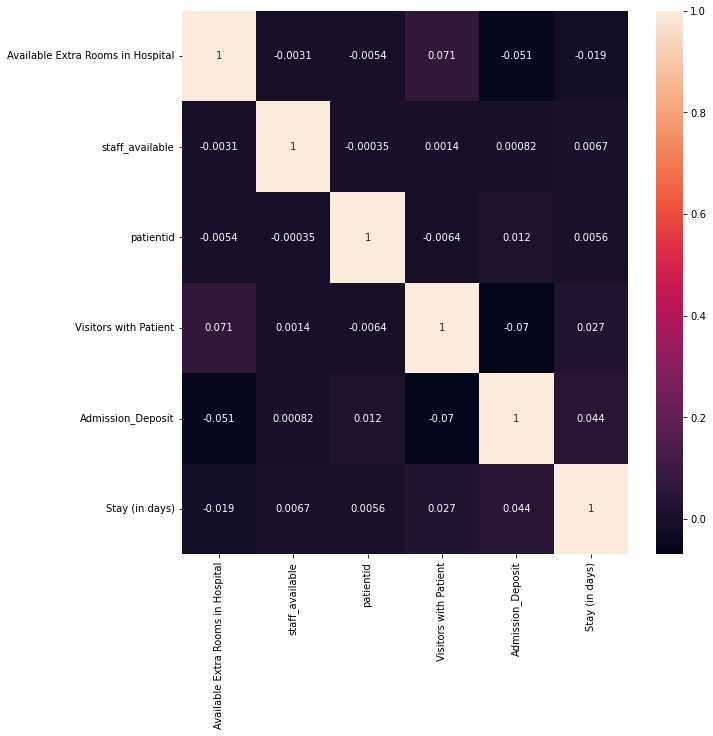

In [16]:
correlations = data.corr()
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(correlations, annot = True)

Observamos que las columnas ('Available Extra Rooms in Hospital', 'staff_available', 'patientid', 'Visitors with Patient', 'Admission_Deposit' y 'Stay (in days)') no estan correlacionadas.

## Análisis de la columna: "Stay (in days)"

Como se nos pide clasificar las estadías en cortas (menor o igual a 8 días) y largas (mayor a 8 días) tomando como referencia 8 días, lo primero que haremos será cambiar a binario la columna 'Stay (in days)'.

In [17]:
# DataFrame antes de efectuar los cambios
data[['Stay (in days)']].head()

,Stay (in days)
0,8
1,9
2,7
3,8
4,34


In [18]:
# Estadías cortas (menor o igual a 8 días) = 0 y estadías largas (mayor a 8 días) = 1
data['Stay (in days)'] = data['Stay (in days)'].apply(lambda x: 0 if x <= 8 else 1)
# DataFrame despues de efectuar los cambios
data[['Stay (in days)']].head()

,Stay (in days)
0,0
1,1
2,0
3,0
4,1


## Análisis de la columna: "patientid"

Es un ID y para este analisis no servira de mucho así que se eliminará.

In [19]:
# Eliminamos del DataFrame
data.drop(['patientid'], axis=1, inplace=True)
print(data.columns)
print(data.shape)

Index(['Available Extra Rooms in Hospital', 'Department', 'Ward_Facility_Code',
       'doctor_name', 'staff_available', 'Age', 'gender', 'Type of Admission',
       'Severity of Illness', 'health_conditions', 'Visitors with Patient',
       'Insurance', 'Admission_Deposit', 'Stay (in days)'],
      dtype='object')
(410000, 14)


## Análisis de las columnas: "Department" - "Ward_Facility_Code" - "doctor_name" - "Age" - "gender" - "Type of Admission" - "Severity of Illness" - "health_conditions" - "Insurance"

Ya que estas columnas poseen diferentes categorias con información relevante, lo primero que haremos es mostrar el tipo de valores únicos de cada columna para saber con que estaremos trabajando y despues las transformaremos de variables tipo **object** a tipo **category** para usarlas en nuestro modelo.

In [20]:
# Valores unicos en la columna 'Department'
data['Department'].unique()

array(['gynecology', 'anesthesia', 'TB & Chest disease', 'radiotherapy',
       'surgery'], dtype=object)

In [21]:
# Valores unicos en la columna 'Ward_Facility_Code'
data['Ward_Facility_Code'].unique()

array(['D', 'B', 'E', 'F', 'A', 'C'], dtype=object)

In [22]:
# Valores unicos en la columna 'doctor_name'
data['doctor_name'].unique()

array(['Dr Sophia', 'Dr Olivia', 'Dr Mark', 'Dr John', 'Dr Sarah',
       'Dr Sam', 'Dr Nathan', 'Dr Simon', 'Dr Isaac'], dtype=object)

In [23]:
# Valores unicos en la columna 'Age'
data['Age'].unique()

array(['41-50', '31-40', '21-30', '71-80', '11-20', '51-60', '61-70',
       '81-90', '91-100', '0-10'], dtype=object)

In [24]:
# Valores unicos en la columna 'gender'
data['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [25]:
# Valores unicos en la columna 'Type of Admission'
data['Type of Admission'].unique()

array(['Trauma', 'Urgent', 'Emergency'], dtype=object)

In [26]:
# Valores unicos en la columna 'Severity of Illness'
data['Severity of Illness'].unique()

array(['Extreme', 'Minor', 'Moderate'], dtype=object)

In [27]:
# Valores unicos en la columna 'health_conditions'
data['health_conditions'].unique()

array(['Diabetes', 'Heart disease', 'None', 'Other', 'Asthama',
       'High Blood Pressure'], dtype=object)

In [28]:
# Valores unicos en la columna 'Insurance'
data['Insurance'].unique()

array(['Yes', 'No'], dtype=object)

In [29]:
# Transformación a variables categoricas
data[["Department","Ward_Facility_Code","doctor_name","Age","gender",
      "Type of Admission","Severity of Illness","health_conditions",
      "Insurance"]] = data[["Department","Ward_Facility_Code","doctor_name","Age","gender","Type of Admission",
                            "Severity of Illness","health_conditions","Insurance"]].astype('category')
data.dtypes

Available Extra Rooms in Hospital       int64
Department                           category
Ward_Facility_Code                   category
doctor_name                          category
staff_available                         int64
Age                                  category
gender                               category
Type of Admission                    category
Severity of Illness                  category
health_conditions                    category
Visitors with Patient                   int64
Insurance                            category
Admission_Deposit                     float64
Stay (in days)                          int64
dtype: object

# Pipeline de la transformación de datos

In [85]:
# Extraemos los datos de los datasets: 'hospitalizaciones_train.csv'
data = pd.read_csv('hospitalizaciones_train.csv')

# Clases del Pipeline
class rows_Duplicates():
    '''Eliminamos filas duplicadas'''
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.drop_duplicates()
        return X
    
class patientid_Dropper():
    '''Eliminamos la columna "patientid" '''
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(['patientid'], axis=1)
    
class to_Category():
    '''Transformamos las columnas de tipo object a category'''
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X[["Department","Ward_Facility_Code","doctor_name",
           "Age","gender","Type of Admission","Severity of Illness",
           "health_conditions","Insurance"]] = X[["Department","Ward_Facility_Code","doctor_name",
                                                     "Age","gender","Type of Admission","Severity of Illness",
                                                     "health_conditions","Insurance"]].astype('category')
        return X
    
class binary_Stay():
    ''' Cambiamos a binario la columna "Stay (in days)" solo si existe '''
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if 'Stay (in days)' in X.columns:
            # Estadías cortas (menor o igual a 8 días) = 0 y estadías largas (mayor a 8 días) = 1
            X['Stay (in days)'] = X['Stay (in days)'].apply(lambda x: 0 if x <= 8 else 1)
            return X
        else:
            return X
        

# Pipeline de transformación de datos
pipe_trans = Pipeline([
    ('duplicates', rows_Duplicates()),
    ('dropper', patientid_Dropper()),
    ('category', to_Category()),
    ('binario', binary_Stay())
])

data = pipe_trans.transform(data)
data.dtypes

Available Extra Rooms in Hospital       int64
Department                           category
Ward_Facility_Code                   category
doctor_name                          category
staff_available                         int64
Age                                  category
gender                               category
Type of Admission                    category
Severity of Illness                  category
health_conditions                    category
Visitors with Patient                   int64
Insurance                            category
Admission_Deposit                     float64
Stay (in days)                          int64
dtype: object

# Preprocesamiento de datos

Una ves limpio el DataFrame, el siguiente paso es dejar las variables listas para poder usarlas en un modelo de Machine Learning.

## Codificación de variables categóricas.

La variable categórica, a diferencia de las variables cardinales o continuas (que permiten cálculos numéricos), clasifica a los individuos o casos. Normalmente toman valores representados por números enteros, como el uno o el cero, pero estos son solo eso, representaciones.

In [35]:
# Variables categoricas (en Dtype: category)
X_cat = data[["Department","Ward_Facility_Code","doctor_name","Age","gender",
              "Type of Admission","Severity of Illness","health_conditions","Insurance"]]
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410000 entries, 0 to 409999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Department           410000 non-null  category
 1   Ward_Facility_Code   410000 non-null  category
 2   doctor_name          410000 non-null  category
 3   Age                  410000 non-null  category
 4   gender               410000 non-null  category
 5   Type of Admission    410000 non-null  category
 6   Severity of Illness  410000 non-null  category
 7   health_conditions    410000 non-null  category
 8   Insurance            410000 non-null  category
dtypes: category(9)
memory usage: 6.6 MB


In [36]:
# Creamos un objeto OneHotEncoder:
codificador = OneHotEncoder()
# Transformamos las variables categoricas a númericas:
codificacion = codificador.fit(X_cat)
# Obtenemos el nombre de cada columna que se va a crear
nombres_columnas = np.array([item for lista in codificador.categories_ for item in lista])
# Creamos un array con las categorias codificadas
X_cat_cod = codificacion.transform(X_cat).toarray()
# Checamos su tamaño:
X_cat_cod.shape

(410000, 47)

Observamos que esta transformación siempre incrementa nuesto número de columnas, en este caso de 8 a 47.

Pasamos la variable **X_cat_cod** a DataFrame:

In [37]:
# Creamos el DataFrame
X_cat = pd.DataFrame(X_cat_cod, columns=nombres_columnas)
X_cat

,TB & Chest disease,anesthesia,gynecology,radiotherapy,surgery,A,B,C,D,E,...,Minor,Moderate,Asthama,Diabetes,Heart disease,High Blood Pressure,None,Other,No,Yes
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
409996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
409997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
409998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## Variables numéricas a utilizar en el modelo.

Aquí creamos un DataFrame que contenga solo variables numéricas de las columnas 'Available Extra Rooms in Hospital', 'staff_available', 'Visitors with Patient' y 'Admission_Deposit' (no incluye a nuestra columna **Stay (in days)**, ya que esta es la columna objetivo). 

In [38]:
# Notemos que hemos elminado la columna objetivo: 'Stay (in days)'.
X_numerical = data[['Available Extra Rooms in Hospital','staff_available','Visitors with Patient','Admission_Deposit']]
X_numerical

,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit
0,4,0,4,2966.408696
1,4,2,2,3554.835677
2,2,8,2,5624.733654
3,4,7,4,4814.149231
4,2,10,2,5169.269637
...,...,...,...,...
409995,1,1,3,3902.291076
409996,5,5,4,4771.995223
409997,4,9,4,3816.994210
409998,10,10,2,3841.577491


## Escalado de datos.

Como tenémos dos DataFrame, **X_cat** y **X_numerical**. Tenemos que unirlos para poder trabajarlos como uno solo (para train y test) y asi poder escalarlo.

In [39]:
# Concatenamos ambos DataFrame para tener uno solo relacionado:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

,TB & Chest disease,anesthesia,gynecology,radiotherapy,surgery,A,B,C,D,E,...,Heart disease,High Blood Pressure,None,Other,No,Yes,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4,0,4,2966.408696
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,4,2,2,3554.835677
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2,8,2,5624.733654
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,4,7,4,4814.149231
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2,10,2,5169.269637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,3,3902.291076
409996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,5,5,4,4771.995223
409997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4,9,4,3816.994210
409998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,10,10,2,3841.577491


El escalado va a transformar los valores de las variables de forma que estén confinados en un rango $[a, b]$, típicamente $[0, 1]$ o $[-1, 1]$. Esto ayuda a que los modelos de **Machine Learning** usen todos los datos de manera uniforme y no haya sesgos hacia una variable debido a su tamaño con respecto a otra.

Para realizar esto, utilizaremos la libreria de **sklearn** que nos da acceso a una función llamada **MinMaxScaler** que escalará los datos.

In [40]:
# Creamos un objeto de MinMaxScaler:
scaler = MinMaxScaler()
# Ingresamos el DataFrame
scaler.fit(X_all)
# Transformamos las variables escaladas:
X = scaler.transform(X_all)
X

array([[0.        , 0.        , 1.        , ..., 0.        , 0.125     ,
        0.15530077],
       [0.        , 0.        , 1.        , ..., 0.2       , 0.0625    ,
        0.22493116],
       [0.        , 0.        , 1.        , ..., 0.8       , 0.0625    ,
        0.46986859],
       ...,
       [0.        , 0.        , 1.        , ..., 0.9       , 0.125     ,
        0.25595319],
       [0.        , 0.        , 1.        , ..., 1.        , 0.0625    ,
        0.25886221],
       [0.        , 0.        , 1.        , ..., 0.        , 0.25      ,
        0.31654591]])

# Pipeline del preprocesamiento de datos

In [48]:
# Clases del Pipeline
class vars_categoricas():
    '''Codificación de variables categoricas'''
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Variables categoricas (en Dtype: category)
        X_cat = X[["Department","Ward_Facility_Code","doctor_name","Age","gender","Type of Admission",
                   "Severity of Illness","health_conditions","Insurance"]]
        # Creamos un objeto OneHotEncoder:
        codificador = OneHotEncoder()
        # Transformamos las variables categoricas a númericas:
        codificacion = codificador.fit(X_cat)
        # Obtenemos el nombre de cada columna que se va a crear
        nombres_columnas = np.array([item for lista in codificador.categories_ for item in lista])
        # Creamos un array con las categorias codificadas
        X_cat_cod = codificacion.transform(X_cat).toarray()
        # Creamos el DataFrame
        X = pd.DataFrame(X_cat_cod, columns=nombres_columnas)
        return X
    
class vars_numericas():
    '''Variables numéricas de todo el dataset'''
    def __init__(self, X_dat):
        self.X_dat = X_dat
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Variables numericas
        X_numerical = self.X_dat[['Available Extra Rooms in Hospital','staff_available','Visitors with Patient','Admission_Deposit']]
        # Concatenamos ambos DataFrame para tener uno solo relacionado:
        X_all = pd.concat([X, X_numerical], axis = 1)
        return X_all
    
class Escalar():
    '''Escalado de datos'''
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Creamos un objeto de MinMaxScaler:
        scaler = MinMaxScaler()
        # Ingresamos el DataFrame
        scaler.fit(X)
        # Transformamos las variables escaladas:
        X = scaler.transform(X)
        return X
        
pipe_prepro = Pipeline([
    ('vars_cat', vars_categoricas()),
    ('vars_num', vars_numericas(data)),
    ('escalado', Escalar())
])

X = pipe_prepro.transform(data)
X

array([[0.        , 0.        , 1.        , ..., 0.        , 0.125     ,
        0.15530077],
       [0.        , 0.        , 1.        , ..., 0.2       , 0.0625    ,
        0.22493116],
       [0.        , 0.        , 1.        , ..., 0.8       , 0.0625    ,
        0.46986859],
       ...,
       [0.        , 0.        , 1.        , ..., 0.9       , 0.125     ,
        0.25595319],
       [0.        , 0.        , 1.        , ..., 1.        , 0.0625    ,
        0.25886221],
       [0.        , 0.        , 1.        , ..., 0.        , 0.25      ,
        0.31654591]])

## Vector de predicciones (objetivo)

Este es el vector que usarémos para entrenar nuestro modelo de Machine Learning

In [54]:
# Variable dependiente
y = data['Stay (in days)']
y

0         0
1         1
2         0
3         0
4         1
         ..
409995    0
409996    1
409997    1
409998    1
409999    0
Name: Stay (in days), Length: 410000, dtype: int64

# Procesamiento de datos

## Set de entrenamiento y de prueba.

Lo primero que haremos será dividir el conjunto de entrenamiento en un 75% para crear el modelo y el otro 25% para probar el modelo, verificamos los resultados y asi asegurar que no tiene **Overfitting**.

Para realizar esto, utilizaremos la libreria de **sklearn** que nos da acceso a una función llamada **train_test_split** que nos dará los datos de entrenamiento (X_train, y_train) y prueba (X_test, y_test).

In [55]:
# Creamos los datos de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) # 25% para entrenamiento

print('Sets de entrenamiento y prueba listos !!!')

Sets de entrenamiento y prueba listos !!!


In [56]:
# Tamaño del modelo de entrenamiento:
X_train.shape

(307500, 51)

In [57]:
# Tamaño del modelo de prueba:
X_test.shape

(102500, 51)

## Regresión Logística.

El primer modelo de Machine Learning que usarémos será el de **Regresión Logística.**

Utilizaremos la libreria de **sklearn.linear_model** que nos da acceso a una función llamada **LogisticRegression** para usar la regresión logística y **sklearn.metrics** que nos da acceso a las funciones  **accuracy_score** y **recall_score** para obtener la tasa de acierto.

### Evaluacion simple del modelo

Evaluamos la forma simple del modelo para saber que tan buena es nuestra predicción

In [63]:
# Creamos un objeto de LogisticRegression:
model_lr = LogisticRegression(max_iter=1000)

# Cremos el modelo para predecir usando los datos de entrenamiento:
model_lr.fit(X_train, y_train)

# Hacemos la predicción, para ver si el modelo se comporta bien:
y_pred = model_lr.predict(X_test)

print(f'Recall: {round(100*recall_score(y_pred, y_test),2)} %')
print(f'Accuracy: {round(100*accuracy_score(y_pred, y_test),2)} %')

Recall: 69.53 %
Accuracy: 65.9 %


### Tuneo de hiperparametros

Vamos a variar algunos parámetros de la función **LogisticRegression** para ver si podemos mejorar las predicciones

In [68]:
%%capture --no-display

my_C = np.logspace(-4, 0, 10)
my_solver = ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
my_iter = [1000, 1500, 2000] 
best_eq = []
best_re = []
best_ac = []

for c in tqdm(my_C, desc='Ejecutando...'):
    print(" ", end='\r')
    for s in my_solver:
        for i in my_iter:
            model_lr = LogisticRegression(max_iter=i, C=c, solver=s, n_jobs=-1)
            model_lr.fit(X_train, y_train)
            y_pred = model_lr.predict(X_test)
            rell = round(100*recall_score(y_pred, y_test),2)
            accy = round(100*accuracy_score(y_pred, y_test),2)
            prom = 0.5*(rell + accy)
            # Equilibrado
            if len(best_eq)==0:
                best_eq.append({'recall':rell, 'accuracy':accy, 'C':c, 'solver':s, 'max_iter':i})
            else:
                if 0.5*(best_eq[-1]['recall'] + best_eq[-1]['accuracy']) < prom:
                    best_eq.append({'recall':rell, 'accuracy':accy, 'C':c, 'solver':s, 'max_iter':i})
                    print({'recall':rell, 'accuracy':accy, 'C':c, 'solver':s, 'max_iter':i, 'Tipo':'EQUILIBRADO'})
            # Recall
            if len(best_re)==0:
                best_eq.append({'recall':rell, 'accuracy':accy, 'C':c, 'solver':s, 'max_iter':i})
            else:
                if best_re[-1]['recall'] < rell:
                    best_eq.append({'recall':rell, 'accuracy':accy, 'C':c, 'solver':s, 'max_iter':i})
                    print({'recall':rell, 'accuracy':accy, 'C':c, 'solver':s, 'max_iter':i, 'Tipo':'RECALL'})
            # Recall
            if len(best_ac)==0:
                best_eq.append({'recall':rell, 'accuracy':accy, 'C':c, 'solver':s, 'max_iter':i})
            else:
                if best_ac[-1]['accuracy'] < accy:
                    best_eq.append({'recall':rell, 'accuracy':accy, 'C':c, 'solver':s, 'max_iter':i})
                    print({'recall':rell, 'accuracy':accy, 'C':c, 'solver':s, 'max_iter':i, 'Tipo':'ACCURACY'})

Ejecutando...:   0%|          | 0/10 [00:00<?, ?it/s]

## Bosques aleatorios.

Utilizaremos la libreria de **sklearn.ensemble** que nos da acceso a una función llamada **RandomForestClassifier** para usar la clasificación por bosques aleatorios.

### Evaluacion simple del modelo

In [ ]:
# Creamos un objeto de RandomForestClassifier:
model_rf = RandomForestClassifier(n_jobs=-1)

# Cremos el modelo para predecir uasando los datos de entrenamiento:
model_rf.fit(X_train, y_train)

# Hacemos la prediccion, para ver si el modelo se comporta bien:
y_pred = model_rf.predict(X_test)

print(f'Recall: {round(100*recall_score(y_pred, y_test),2)} %')
print(f'Accuracy: {round(100*accuracy_score(y_pred, y_test),2)} %')

### Tuneo de hiperparametros

In [ ]:
my_criterion = ['entropy', 'gini']
my_nEstimators = [7, 6, 5, 4, 3, 2, 1]
my_maxSamples = np.linspace(0.3, 0.4, 30)
max_features = ['auto', 'sqrt']
best_eq = []
best_re = []
best_ac = []

for samp in tqdm(my_maxSamples, desc='Ejecutando...'):
    print(" ", end='\r')
    for crit in my_criterion:
        for est in my_nEstimators:
            model_rf = RandomForestClassifier(criterion=crit, n_estimators=est, max_samples=samp, max_features='sqrt', max_depth=200 ,n_jobs=-1)
            model_rf.fit(X_train, y_train)
            y_pred = model_rf.predict(X_test)
            rell = round(100*recall_score(y_pred, y_test),2)
            accy = round(100*accuracy_score(y_pred, y_test),2)
            prom = 0.5*(rell + accy)
            # Equilibrado
            if len(best_eq)==0:
                best_eq.append({'recall':rell, 'accuracy':accy, 'criterion':crit, 'n_estimators':est, 'max_samples':samp})
            else:
                if 0.5*(best_eq[-1]['recall'] + best_eq[-1]['accuracy']) < prom:
                    best_eq.append({'recall':rell, 'accuracy':accy, 'criterion':crit, 'n_estimators':est, 'max_samples':samp})
                    print({'recall':rell, 'accuracy':accy, 'criterion':crit, 'n_estimators':est, 'max_samples':samp, 'Tipo':'EQUILIBRADO'})
            # Recall
            if len(best_re)==0:
                best_re.append({'recall':rell, 'accuracy':accy, 'criterion':crit, 'n_estimators':est, 'max_samples':samp})
            else:
                if best_re[-1]['recall'] < rell:
                    best_re.append({'recall':rell, 'accuracy':accy, 'criterion':crit, 'n_estimators':est, 'max_samples':samp})
                    print({'recall':rell, 'accuracy':accy, 'criterion':crit, 'n_estimators':est, 'max_samples':samp, 'Tipo':'RECALL'})
            # Accuracy
            if len(best_ac)==0:
                best_ac.append({'recall':rell, 'accuracy':accy, 'criterion':crit, 'n_estimators':est, 'max_samples':samp})
            else:
                if best_ac[-1]['accuracy'] < accy:
                    best_ac.append({'recall':rell, 'accuracy':accy, 'criterion':crit, 'n_estimators':est, 'max_samples':samp})
                    print({'recall':rell, 'accuracy':accy, 'criterion':crit, 'n_estimators':est, 'max_samples':samp, 'Tipo':'ACCURACY'})

## KNeighborsClassifier

Utilizaremos la libreria de **sklearn.neighbors** que nos da acceso a una función llamada **KNeighborsClassifier** para usar la clasificación por vecinos cercanos.

### Evaluacion simple del modelo

In [ ]:
# Creamos un objeto de KNeighborsClassifier:
model_knc = KNeighborsClassifier(n_jobs=-1)

# Cremos el modelo para predecir uasando los datos de entrenamiento:
model_knc.fit(X_train, y_train)

# Hacemos la prediccion, para ver si el modelo se comporta bien:
y_pred = model_knc.predict(X_test)

print(f'Recall: {round(100*recall_score(y_pred, y_test),2)} %')
print(f'Accuracy: {round(100*accuracy_score(y_pred, y_test),2)} %')

### Tuneo de hiperparametros

In [ ]:
my_algorithm = ['brute', 'ball_tree', 'kd_tree']
my_p = [2, 1]
my_weights = ['distance', 'uniform']
best_eq = []
best_re = []
best_ac = []

for alg in tqdm(my_algorithm, desc='Ejecutando...'):
    print(" ", end='\r')
    for wei in my_weights:
        for pot in my_p: 
            model_knc = KNeighborsClassifier(n_neighbors=3, algorithm=alg, p=pot, weights=wei ,n_jobs=-1)
            model_knc.fit(X_train, y_train)
            y_pred = model_knc.predict(X_test)
            rell = round(100*recall_score(y_pred, y_test),2)
            accy = round(100*accuracy_score(y_pred, y_test),2)
            prom = 0.5*(rell + accy)
            # Equilibrado
            if len(best_eq)==0:
                best_eq.append({'recall':rell, 'accuracy':accy, 'algorithm':alg, 'p':pot, 'weights':wei})
            else:
                if 0.5*(best_eq[-1]['recall'] + best_eq[-1]['accuracy']) < prom:
                    best_eq.append({'recall':rell, 'accuracy':accy, 'algorithm':alg, 'p':pot, 'weights':wei})
                    print({'recall':rell, 'accuracy':accy, 'algorithm':alg, 'p':pot, 'weights':wei, 'TIPO':'Equilibrado'})
                    
            # Recall
            if len(best_re)==0:
                best_re.append({'recall':rell, 'accuracy':accy, 'algorithm':alg, 'p':pot, 'weights':wei})
            else:
                if best_re[-1]['recall'] < rell:
                    best_re.append({'recall':rell, 'accuracy':accy, 'algorithm':alg, 'p':pot, 'weights':wei})
                    print({'recall':rell, 'accuracy':accy, 'algorithm':alg, 'p':pot, 'weights':wei, 'TIPO':'Recall'})
                    
            # Accuracy
            if len(best_ac)==0:
                best_ac.append({'recall':rell, 'accuracy':accy, 'algorithm':alg, 'p':pot, 'weights':wei})
            else:
                if best_ac[-1]['accuracy'] < accy:
                    best_ac.append({'recall':rell, 'accuracy':accy, 'algorithm':alg, 'p':pot, 'weights':wei})
                    print({'recall':rell, 'accuracy':accy, 'algorithm':alg, 'p':pot, 'weights':wei, 'TIPO':'Accuracy'})

# Predicción

Lo primero que haremos sera obtener los nuevos **X_train**, **X_test** usando los Pipelines creados anteriormente.

In [113]:
# Extraemos los datos del dataset 'hospitalizaciones_train.csv' y 'hospitalizaciones_train.csv'
data_train = pd.read_csv('hospitalizaciones_train.csv')
data_test = pd.read_csv('hospitalizaciones_test.csv')
# Eliminamos la columna '' del DataFrame data_train, ya que esa columna no la usaremos
data_train.drop(['Stay (in days)'], axis=1, inplace=True)
# Combinamos ambos DataFrames
data_all = pd.concat([data_train, data_test], axis = 0)
# Reestablecemos los indices
data_all.reset_index(inplace=True, drop=True)
data_all

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,4,gynecology,F,Dr Sarah,2,43001,11-20,Female,Trauma,Minor,High Blood Pressure,3,No,4105.795901
499996,13,gynecology,F,Dr Olivia,8,85601,31-40,Female,Emergency,Moderate,Other,2,No,4631.550257
499997,2,gynecology,B,Dr Sarah,3,22447,11-20,Female,Emergency,Moderate,High Blood Pressure,2,No,5456.930075
499998,2,radiotherapy,A,Dr John,1,29957,61-70,Female,Trauma,Extreme,Diabetes,2,No,4694.127772


In [114]:
# Transformamos los datos con el primer Pipeline
data_all = pipe_trans.transform(data_all)
data_all.dtypes

Available Extra Rooms in Hospital       int64
Department                           category
Ward_Facility_Code                   category
doctor_name                          category
staff_available                         int64
Age                                  category
gender                               category
Type of Admission                    category
Severity of Illness                  category
health_conditions                    category
Visitors with Patient                   int64
Insurance                            category
Admission_Deposit                     float64
dtype: object

In [115]:
pipe_prepro = Pipeline([
    ('vars_cat', vars_categoricas()),
    ('vars_num', vars_numericas(data_all)),
    ('escalado', Escalar())
])
# Preprocesamos los datos con el segundo Pipeline
X = pipe_prepro.transform(data_all)
X

array([[0.        , 0.        , 1.        , ..., 0.        , 0.125     ,
        0.15530077],
       [0.        , 0.        , 1.        , ..., 0.2       , 0.0625    ,
        0.22493116],
       [0.        , 0.        , 1.        , ..., 0.8       , 0.0625    ,
        0.46986859],
       ...,
       [0.        , 0.        , 1.        , ..., 0.3       , 0.0625    ,
        0.45001188],
       [0.        , 0.        , 0.        , ..., 0.1       , 0.0625    ,
        0.35974712],
       [0.        , 0.        , 1.        , ..., 0.3       , 0.125     ,
        0.3620831 ]])

In [116]:
# Dividimos el conjunto de entrenamiento como venia en los archivos proporcionados. Despues haremos las predicción.
X_train, X_test = X[:410000], X[410000:]
X_train.shape, X_test.shape

((410000, 51), (90000, 51))

Despues sarémos el modelo de **Bosques aleatorios** ya que dio el mejor **recall** y **accuracy**, los hiperparámetros serán:

* criterion='gini' 
* n_estimators=2
* max_samples=0.9 
* max_features='sqrt' 
* max_depth =200
* n_jobs=-1

In [120]:
# Creamos un objeto de RandomForestClassifier:
model_rfc = RandomForestClassifier(criterion='gini', n_estimators=2, max_samples=0.9, max_features='sqrt', max_depth =200, n_jobs=-1)

# Cremos el modelo para predecir uasando los datos de entrenamiento:
model_rfc.fit(X_train, y)

# Hacemos la prediccion:
y_pred = model_rfc.predict(X_test)

# Creamos un DataFrame con las predicciones:
pred = pd.DataFrame(y_pred, columns=[['pred']])

# Guardamos la prediccion:
pred.to_csv('JozCrzBrgn_.csv', index=False)

print('El modelo ha sido guardado!!!')


El modelo ha sido guardado!!!
